In [133]:
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 30



%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [134]:
df = pd.read_csv('../input/cran_data.csv')
df.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),337,79.5
1,CENSUS,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - OPERATIONS WITH AREA HA...",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),11,44.5
2,CENSUS,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - OPERATIONS WITH SALES",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),11,44.5
3,CENSUS,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - PRODUCTION, MEASURED IN...",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),"11,479",80.4
4,CENSUS,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - SALES, MEASURED IN $",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),"1,221,504",59.0


In [135]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df.head()

,program,year,period,week_ending,geo_level,state,state_ansi,ag_district,ag_district_code,county,county_ansi,zip_code,region,watershed_code,watershed,commodity,data_item,domain,domain_category,value,cv_(%)
0,CENSUS,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),337,79.5
1,CENSUS,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - OPERATIONS WITH AREA HA...",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),11,44.5
2,CENSUS,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - OPERATIONS WITH SALES",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),11,44.5
3,CENSUS,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - PRODUCTION, MEASURED IN...",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),"11,479",80.4
4,CENSUS,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - SALES, MEASURED IN $",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),"1,221,504",59.0


In [136]:
yield_df = df[df.data_item.str.contains('YIELD')]
yield_df.value= yield_df.value.astype(float)


/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_20649/1871444534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_df.value= yield_df.value.astype(float)


In [137]:
yield_df = yield_df[['year','value']]
yield_df.to_csv('../output/yield.csv', index=False)

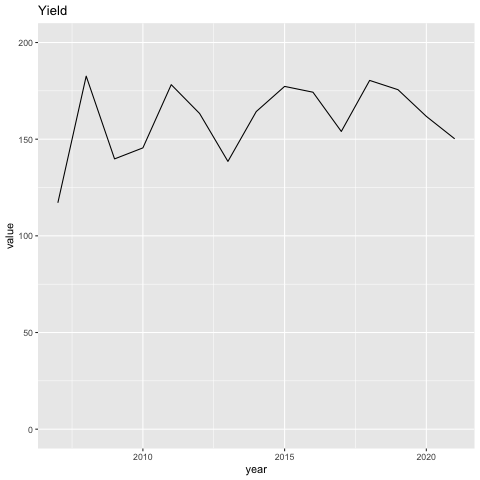

In [138]:
%%R -i yield_df

library(ggplot2)
library(ggthemes)

ggplot(yield_df, aes(x = year, y = value)) + 
#geom_bar(orientation = 'v', stat = 'identity')
geom_line() +
ylim(0, 200) +
labs(title = 'Yield')


In [139]:
df.groupby('year').data_item.value_counts()

year  data_item                                                
1900  CRANBERRIES - PRICE RECEIVED, MEASURED IN $ / BARREL         1
1901  CRANBERRIES - PRICE RECEIVED, MEASURED IN $ / BARREL         1
1902  CRANBERRIES - PRICE RECEIVED, MEASURED IN $ / BARREL         1
1903  CRANBERRIES - PRICE RECEIVED, MEASURED IN $ / BARREL         1
1904  CRANBERRIES - PRICE RECEIVED, MEASURED IN $ / BARREL         1
                                                                  ..
2021  CRANBERRIES, PROCESSING - PRODUCTION, MEASURED IN $          1
      CRANBERRIES, PROCESSING - PRODUCTION, MEASURED IN BARRELS    1
      CRANBERRIES, UTILIZED - PRODUCTION, MEASURED IN $            1
      CRANBERRIES, UTILIZED - PRODUCTION, MEASURED IN BARRELS      1
2022  CRANBERRIES - PRODUCTION, MEASURED IN BARRELS                2
Name: data_item, Length: 407, dtype: int64

In [140]:
df[df.data_item.str.contains('ACRES HARVESTED')].sort_values('year').head()

,program,year,period,week_ending,geo_level,state,state_ansi,ag_district,ag_district_code,county,county_ansi,zip_code,region,watershed_code,watershed,commodity,data_item,domain,domain_category,value,cv_(%)
162,CENSUS,1997,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,CRANBERRIES - ACRES HARVESTED,TOTAL,NOT SPECIFIED,"15,405",NaN
160,CENSUS,2002,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,CRANBERRIES - ACRES HARVESTED,TOTAL,NOT SPECIFIED,"14,707",NaN
155,CENSUS,2007,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,CRANBERRIES - ACRES HARVESTED,TOTAL,NOT SPECIFIED,"12,521",NaN
355,SURVEY,2007,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,CRANBERRIES - ACRES HARVESTED,TOTAL,NOT SPECIFIED,"13,000",NaN
144,CENSUS,2008,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),131,NaN


In [141]:
harvest = df[df.data_item.str.contains('ACRES HARVESTED')]
harvest.year.value_counts()

2008    3
2014    3
2021    2
2011    2
2019    2
2007    2
2012    2
2015    2
2016    2
2002    1
1997    1
2020    1
2018    1
2017    1
2013    1
2010    1
2009    1
Name: year, dtype: int64

In [142]:
harvest = harvest[harvest.program == "SURVEY"]
harvest.head()

,program,year,period,week_ending,geo_level,state,state_ansi,ag_district,ag_district_code,county,county_ansi,zip_code,region,watershed_code,watershed,commodity,data_item,domain,domain_category,value,cv_(%)
169,SURVEY,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,CRANBERRIES - ACRES HARVESTED,TOTAL,NOT SPECIFIED,"12,000",NaN
183,SURVEY,2020,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,CRANBERRIES - ACRES HARVESTED,TOTAL,NOT SPECIFIED,"12,700",NaN
197,SURVEY,2019,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,CRANBERRIES - ACRES HARVESTED,TOTAL,NOT SPECIFIED,"12,300",NaN
211,SURVEY,2018,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,CRANBERRIES - ACRES HARVESTED,TOTAL,NOT SPECIFIED,"12,700",NaN
225,SURVEY,2017,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,CRANBERRIES - ACRES HARVESTED,TOTAL,NOT SPECIFIED,"12,300",NaN


In [143]:
harvest.year.value_counts()

2021    1
2020    1
2019    1
2018    1
2017    1
2016    1
2015    1
2014    1
2013    1
2012    1
2011    1
2010    1
2009    1
2008    1
2007    1
Name: year, dtype: int64

In [144]:
harvest.value = harvest.value.str.replace(',', '')
harvest.value = harvest.value.str.replace(' ', '')
harvest.value = harvest.value.astype(float)

/Users/jake/.pyenv/versions/3.10.9/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "cv_(%)". Fall back to string conversion. The error is: <class 'float'>
  warnings.warn('Error while trying to convert '


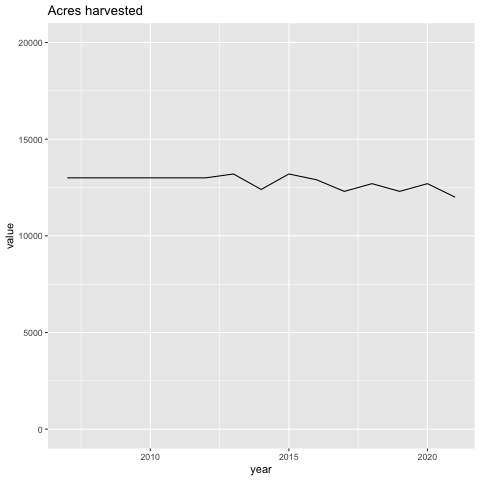

In [145]:
%%R -i harvest

library(ggplot2)
library(ggthemes)

ggplot(harvest, aes(x = year, y = value)) + 
#geom_bar(orientation = 'v', stat = 'identity')
geom_line() +
ylim(0, 20000) +
labs(title = 'Acres harvested')


In [146]:
harvest[['year','value']].to_csv('../output/harvest.csv', index=False)

In [147]:
utilized = df[df.data_item.str.contains("UTILIZED")]
utilized.head()

,program,year,period,week_ending,geo_level,state,state_ansi,ag_district,ag_district_code,county,county_ansi,zip_code,region,watershed_code,watershed,commodity,data_item,domain,domain_category,value,cv_(%)
177,SURVEY,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, UTILIZED - PRODUCTION, MEASURED IN $",TOTAL,NOT SPECIFIED,"65,689,000",NaN
178,SURVEY,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, UTILIZED - PRODUCTION, MEASURED I...",TOTAL,NOT SPECIFIED,"1,742,400",NaN
191,SURVEY,2020,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, UTILIZED - PRODUCTION, MEASURED IN $",TOTAL,NOT SPECIFIED,"72,553,000",NaN
192,SURVEY,2020,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, UTILIZED - PRODUCTION, MEASURED I...",TOTAL,NOT SPECIFIED,"2,036,470",NaN
205,SURVEY,2019,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, UTILIZED - PRODUCTION, MEASURED IN $",TOTAL,NOT SPECIFIED,"72,484,000",NaN


In [148]:
barrels = utilized[utilized.data_item.str.contains("BARRELS")]
barrels.drop(barrels[barrels.data_item.str.contains("ACRE")].index, inplace=True)
barrels.head()

/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_20649/2758377514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrels.drop(barrels[barrels.data_item.str.contains("ACRE")].index, inplace=True)


,program,year,period,week_ending,geo_level,state,state_ansi,ag_district,ag_district_code,county,county_ansi,zip_code,region,watershed_code,watershed,commodity,data_item,domain,domain_category,value,cv_(%)
178,SURVEY,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, UTILIZED - PRODUCTION, MEASURED I...",TOTAL,NOT SPECIFIED,"1,742,400",NaN
192,SURVEY,2020,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, UTILIZED - PRODUCTION, MEASURED I...",TOTAL,NOT SPECIFIED,"2,036,470",NaN
206,SURVEY,2019,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, UTILIZED - PRODUCTION, MEASURED I...",TOTAL,NOT SPECIFIED,"2,123,240",NaN
220,SURVEY,2018,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, UTILIZED - PRODUCTION, MEASURED I...",TOTAL,NOT SPECIFIED,"2,244,230",NaN
233,SURVEY,2017,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, UTILIZED - PRODUCTION, MEASURED I...",TOTAL,NOT SPECIFIED,"1,894,400",NaN


In [149]:
barrels.value = barrels.value.str.replace(',', '')

barrels.value = barrels.value.astype(float)

/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_20649/455897350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrels.value = barrels.value.str.replace(',', '')
/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_20649/455897350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barrels.value = barrels.value.astype(float)


In [150]:
barrels = barrels[['year', 'value']]

In [151]:
barrels.to_csv('../output/barrels.csv')

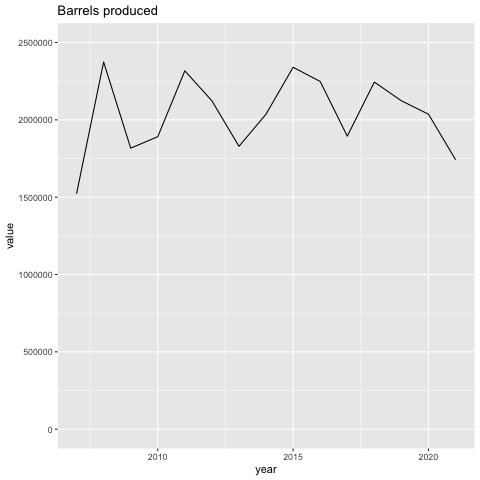

In [152]:
%%R -i barrels

ggplot(barrels, aes(x = year, y = value)) +
#geom_bar(orientation = "v", stat = "identity")
geom_line() +
ylim(0, 2500000) +
labs(title = "Barrels produced")

In [153]:
price = df[df.data_item.str.contains('PRICE')]
price.drop(price[price.data_item.str.contains('FRESH')].index, inplace=True)
price.drop(price[price.data_item.str.contains('PROCESSING')].index, inplace=True)
price.value = price.value.astype(float)

/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_20649/2018769872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price.drop(price[price.data_item.str.contains('FRESH')].index, inplace=True)
/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_20649/2018769872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price.drop(price[price.data_item.str.contains('PROCESSING')].index, inplace=True)
/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_20649/2018769872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [154]:
price[['year', 'value']].to_csv('../output/price.csv')

/Users/jake/.pyenv/versions/3.10.9/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "cv_(%)". Fall back to string conversion. The error is: <class 'float'>
  warnings.warn('Error while trying to convert '


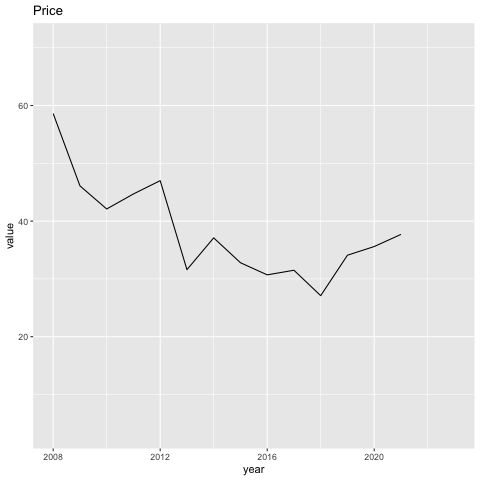

In [155]:
%%R -i price

ggplot(price, aes(x = year, y = value)) +
#geom_bar(orientation = "v", stat = "identity")
geom_line() +
xlim(2008, 2023) +
labs(title = "Price")

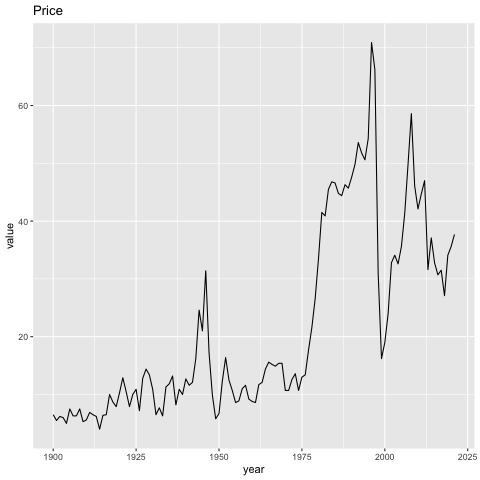

In [156]:
%%R -i price

ggplot(price, aes(x = year, y = value)) +
#geom_bar(orientation = "v", stat = "identity")
geom_line() +
#xlim(2008, 2023) +
labs(title = "Price")

In [157]:
organic = df[df.data_item.str.contains('ORGANIC')]

In [158]:
organic_acres = organic[organic.data_item.str.contains('ACRES')]
organic_acres.drop(organic_acres[organic_acres.value.str.contains('D')].index, inplace=True)
organic_acres.value = organic_acres.value.astype(float)

/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_20649/951391789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_acres.drop(organic_acres[organic_acres.value.str.contains('D')].index, inplace=True)
/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_20649/951391789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_acres.value = organic_acres.value.astype(float)


In [159]:
organic_acres

,program,year,period,week_ending,geo_level,state,state_ansi,ag_district,ag_district_code,county,county_ansi,zip_code,region,watershed_code,watershed,commodity,data_item,domain,domain_category,value,cv_(%)
0,CENSUS,2021,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),337.0,79.5
12,CENSUS,2019,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),559.0,52.3
74,CENSUS,2016,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),121.0,38.1
86,CENSUS,2015,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),98.0,59.4
92,CENSUS,2014,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),87.0,38.1
93,CENSUS,2014,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),87.0,38.1
144,CENSUS,2008,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED & EXEMPT),131.0,NaN
145,CENSUS,2008,YEAR,NaN,STATE,MASSACHUSETTS,25,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CRANBERRIES,"CRANBERRIES, ORGANIC - ACRES HARVESTED",ORGANIC STATUS,ORGANIC STATUS: (NOP USDA CERTIFIED),131.0,NaN


In [160]:
organic_acres[['year', 'value']].to_csv('../output/organic_acres.csv')

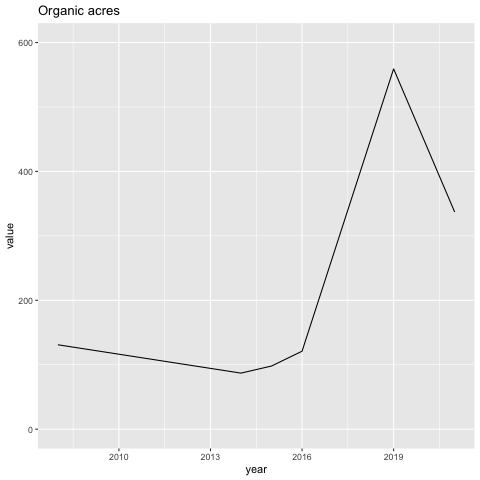

In [168]:
%%R -i organic_acres

ggplot(organic_acres, aes(x = year, y = value)) +
#geom_bar(orientation = "v", stat = "identity")
geom_line() +
ylim(0, 600) +
labs(title = "Organic acres")